In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets.samples_generator import make_blobs
%matplotlib inline

In [2]:
def plot(labels, data, centroids=None,num_clusters=2):
    colors = ['r','g','b','y','c','m']
    for i in range(num_clusters):
        cluster = data[labels == i]
        plt.scatter(cluster[:,0],cluster[:,1], c=colors[i])
    if not (centroids is None):
        for i in range(num_clusters):
            plt.scatter(centroids[i,0], centroids[i,1], c=colors[i],marker='x', s=50)

In [3]:
class K_Means():
    """class for K_Means classification"""
    def __init__(self, eps=1e-3, dim=2, n_clusters=2):
        self.eps = eps
        self.dim = dim
        self.n_clusters = n_clusters
        
    def _init_centroids(self,data):
        return np.array(
            [data.mean(axis=0)+np.random.randn()
             for i in range(self.n_clusters)])
        
    def fit(self,data, maxiter = 1000, max_reset=10):
        """method for fitting data; -> (labels,centroids)"""
        #initializing centroids
        found_good_ones = False
        for j in range(max_reset):
            centroids = self._init_centroids(data)
            ctr_prev = centroids.copy()
        
            for i in range(maxiter):
                #labeling our data
                labels = np.array([ np.argmin([ np.linalg.norm(x-c) for c in centroids]) for x in data])
                #updating centroids
                for i in range(self.n_clusters):
                    centroids[i] = data[labels == i].mean(axis=0)
                if np.isnan(centroids).any():
                    found_good_ones = False
                    break
                if np.abs(ctr_prev-centroids).max() < self.eps:
                    found_good_ones = True
                    break
                ctr_prev = centroids.copy()
            if found_good_ones: break
        return labels, centroids

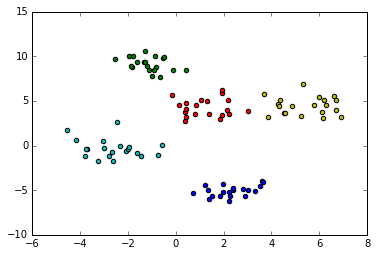

In [4]:
data, labels_true = make_blobs(n_samples=100, n_features=2, centers=5)
plot(labels_true,data,num_clusters=5)

clf = K_Means(n_clusters=5)

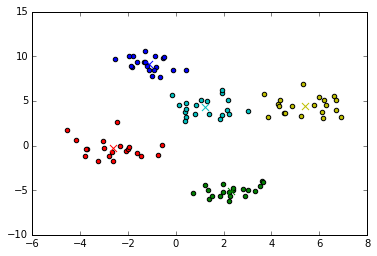

In [5]:
labs, cents = clf.fit(data)

plot(labs, data, centroids=cents, num_clusters=5)